In [43]:
from keras.models import load_model
from time import sleep
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np


In [44]:
face_classifier = cv2.CascadeClassifier(r'C:\Users\armej\Desktop\PID\Emotion_Detection_CNN\haarcascade_frontalface_default.xml')

classifier =load_model(r'C:\Users\armej\Desktop\PID\Emotion_Detection_CNN\model.h5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

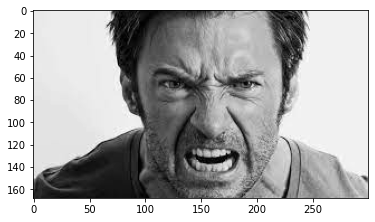

In [45]:
#cargabdo la imagen
img = cv2.imread(r'C:\Users\armej\Desktop\PID\images\persona_enojada1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

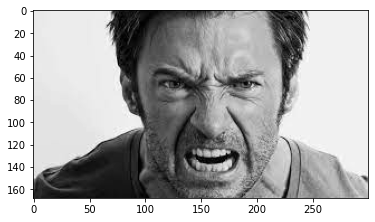

In [46]:
faces = face_classifier.detectMultiScale(gray)
plt.imshow(gray,cmap='gray')

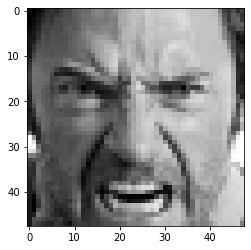

In [47]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
    #enmascarando solo el rostro de la persona
    roi_gray = gray[y:y+h,x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

plt.imshow(roi_gray,cmap='gray')

In [48]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
    #enmascarando solo el rostro de la persona
    roi_gray = gray[y:y+h,x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0 # 
        roi = img_to_array(roi)# convirtiendo en una matriz numpy
        roi = np.expand_dims(roi,axis=0)
        prediction = classifier.predict(roi)[0]
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    else:
        cv2.putText(img,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

1/1 [==============================] - 0s 230ms/step


In [49]:
cv2.imshow('Emotion Detector',img)
cv2.waitKey()

-1